## Q1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
dataset = loadmat('face_emotion_data.mat')

X, y = dataset['X'], dataset['y']
n, p = np.shape(X)

y[y==-1] = 0  # use 0/1 for labels instead of -1/+1
X = np.hstack((np.ones((n,1)), X))  # append a column of ones

In [8]:
#1A

def train_KNN(X, y, train_i, lam, sig):
    X_train = X[train_i]
    y_train = y[train_i]
    n, _ = X_train.shape
    dist_sq = np.sum((X_train[:, np.newaxis] - X_train) ** 2, axis=2)
    K = np.exp(-dist_sq / (2 * sig**2))
    alpha = np.linalg.inv(K + lam * np.identity(n)) @ y_train
    yhat = K @ alpha
    yhat_pred = (yhat > 0.5).astype(int)
    train_err = np.mean(y_train != yhat_pred)
    return alpha, train_err


def test_KNN(X, y, train_i, test_i, alpha, sig):
    X_train = X[train_i]
    y_train = y[train_i]
    X_test = X[test_i]
    y_test = y[test_i]
    dist_sq = np.sum((X_test[:, np.newaxis] - X_train) ** 2, axis=2)
    K = np.exp(-dist_sq / (2 * sig**2))
    yhat = K @ alpha
    yhat_pred = (yhat > 0.5).astype(int)
    test_err = np.mean(y_test != yhat_pred)
    return test_err

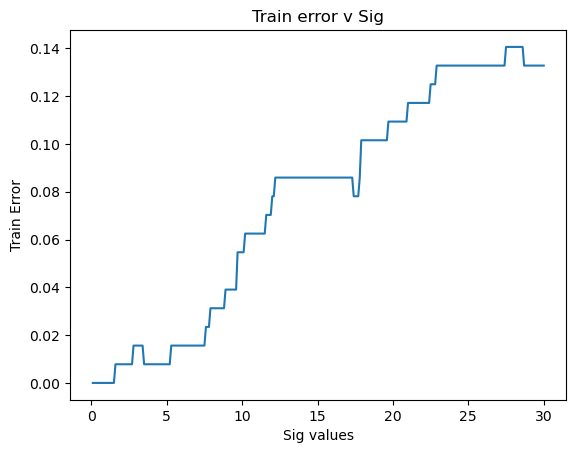

In [11]:
#1B
sigs = np.linspace(0.1, 30, 300)
errs = []

for sig in sigs:
    alpha, train_err = train_KNN(X, y, list(range(128)), 0.5, sig)
    errs.append(train_err)

plt.plot(sigs, errs)
plt.title("Train error v Sig")
plt.xlabel("Sig values")
plt.ylabel("Train Error")
plt.show()

# Yes, there is perfect accuracy when small sigs are run on (under ~2) the test data

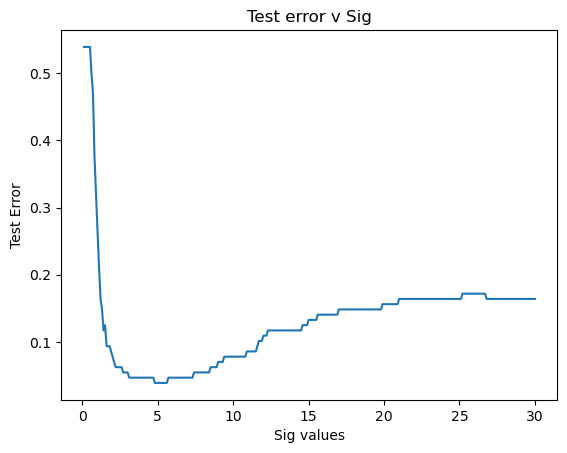

In [12]:
#1C
#why is this taking forever

sigs = np.linspace(0.1, 30, 300)
errs = []
for sig in sigs:
    test_acc = []
    for i in range(8):
        test_i = np.arange(i * 16, (i + 1) * 16)
        train_i = np.setdiff1d(np.arange(128), test_i)
        alpha, train_err = train_KNN(X, y, train_i, 0.5, sig)
        err = test_KNN(X, y, train_i, test_i, alpha, sig)
        test_acc.append(err)
    errs.append(np.mean(test_acc))

plt.plot(sigs, errs)
plt.title("Test error v Sig")
plt.xlabel("Sig values")
plt.ylabel("Test Error")
plt.show()

# No, you can't reach perfect test accuracy with the 8-fold cross validation